Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
features :  ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


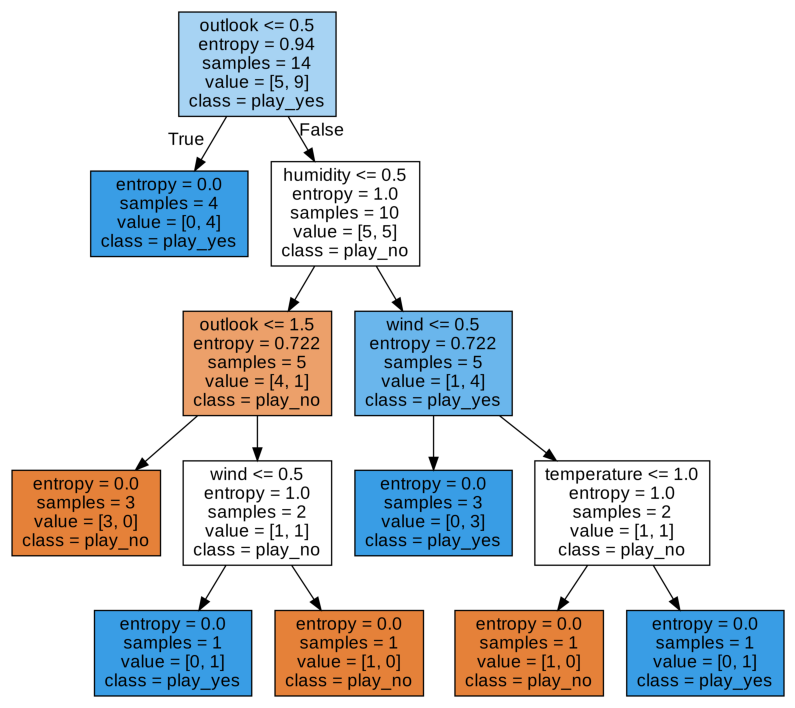

In [ ]:
import numpy as np
import torch
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import call
import matplotlib.pyplot as plt


#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)


#Step 4: Merge different features to prepare dataset
features = tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("features : ",features)


regression = DecisionTreeClassifier(criterion='entropy')

regression.fit(features,Play)
export_graphviz(regression,out_file='tree_entropy.dot',feature_names=['outlook','temperature','humidity','wind'],class_names=['play_no','play_yes'],filled=True)

# Convert to png

call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();


Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


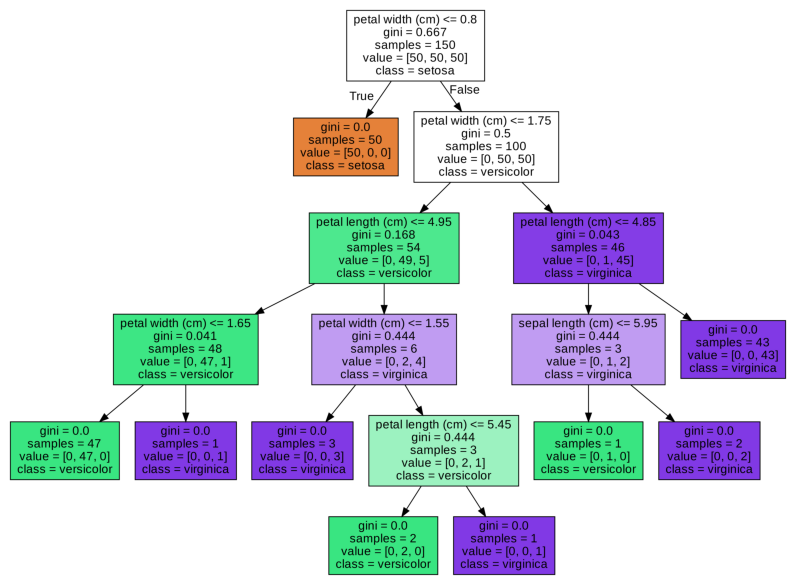

In [29]:
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

#Load dataset
iris = datasets.load_iris()
#print(iris)
#print the names of the 13 features
print("Features: ", iris.feature_names)
#print the label type of wine(class_0, class_1, class_2)
print("Labels: ", iris.target_names)

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(iris.data,iris.target);


export_graphviz(clf,out_file='tree_iris_entropy.dot',feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],class_names=['setosa' ,'versicolor' ,'virginica'],filled=True)




call(['dot', '-Tpng', 'tree_iris_entropy.dot', '-o', 'tree_iris_entropy.png','-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_iris_entropy.png'))
plt.axis('off');
plt.show();
